In [31]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [32]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [33]:
df.index.name = 'job_index'

In [34]:
df_usa = df[df['job_country'] =='United States']
df_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [35]:
df_usa.index.name = 'job_index'
df_usa.reset_index(inplace = True)

In [36]:
df_usa.set_index('job_index', inplace = True)
df_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [49]:
median_pivot = df_usa.pivot_table(values ='salary_year_avg', index = 'job_title_short', aggfunc =['median', 'min', 'max'])
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,35000.0,387460.0
Cloud Engineer,116100.0,42000.0,221844.0
Data Analyst,90000.0,25000.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Data Scientist,130000.0,30000.0,960000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Analyst,110000.0,35360.0,425000.0
Senior Data Engineer,150000.0,45000.0,375000.0


In [50]:
median_pivot.sort_values(by = ('median', 'salary_year_avg'), ascending= False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,155000.0,55000.0,475000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Engineer,150000.0,45000.0,375000.0
Data Scientist,130000.0,30000.0,960000.0
Software Engineer,130000.0,48982.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Cloud Engineer,116100.0,42000.0,221844.0
Senior Data Analyst,110000.0,35360.0,425000.0


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, 'Senior Data Scientist'),
  Text(0.0, 0, 'Business Analyst'),
  Text(2.0, 0, 'Data Analyst'),
  Text(4.0, 0, 'Data Scientist'),
  Text(6.0, 0, 'Senior Data Analyst'),
  Text(8.0, 0, 'Senior Data Scientist'),
  Text(10.0, 0, '')])

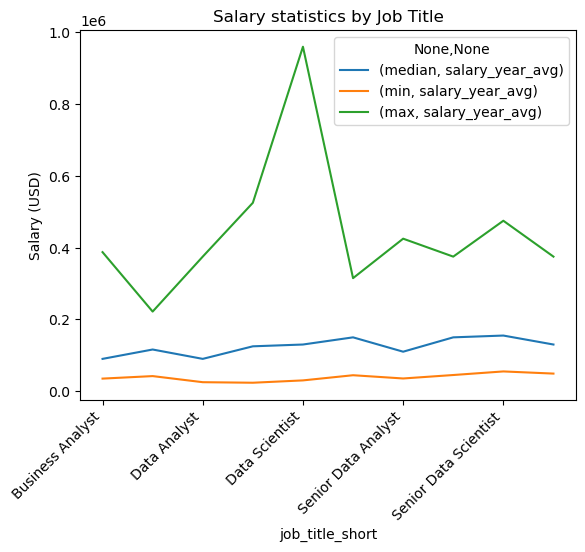

In [55]:
median_pivot.plot()

plt.title("Salary statistics by Job Title")
plt.ylabel("Salary (USD)")
plt.xticks(rotation = 45, ha = 'right')